### Questions

### Objectives


### Lesson Outline:

Step: Sample Data Exploration (10 min)

Step: Box-Cox demonstration, followed by students transforming in small groups (10 min)

Step: Student Discussion (10 min)

In [1]:
import pandas as pd
import numpy as np

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

#### Step: Sample Data Exploration

Time: 10 min

Goal/Scenario:

Let’s do EDA for a regression, checking all assumptions as we go. Then, students make an OLS model and check remaining assumptions.

Learning Goals in sequence:

Look at relationships between predictors, response variable, and other predictors using VIF, scatterplot matrices, ands marginal plots. Once model is done, check remaining assumptions. Determine if a transformation is needed and, if so, for which variables. Determine whether endogenous variables exist.


In [2]:
df = pd.read_csv("Bordeaux.csv")
df.head()

,Wine,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar
0,Lafite,2850,100,19.5,1,1,0,0,0
1,Latour,2850,98,18.5,1,1,0,0,0
2,Margaux,2900,100,19.5,1,1,0,0,0
3,Mouton,2500,97,17.0,1,1,0,0,0
4,Haut Brion,2500,98,18.5,1,1,0,0,0


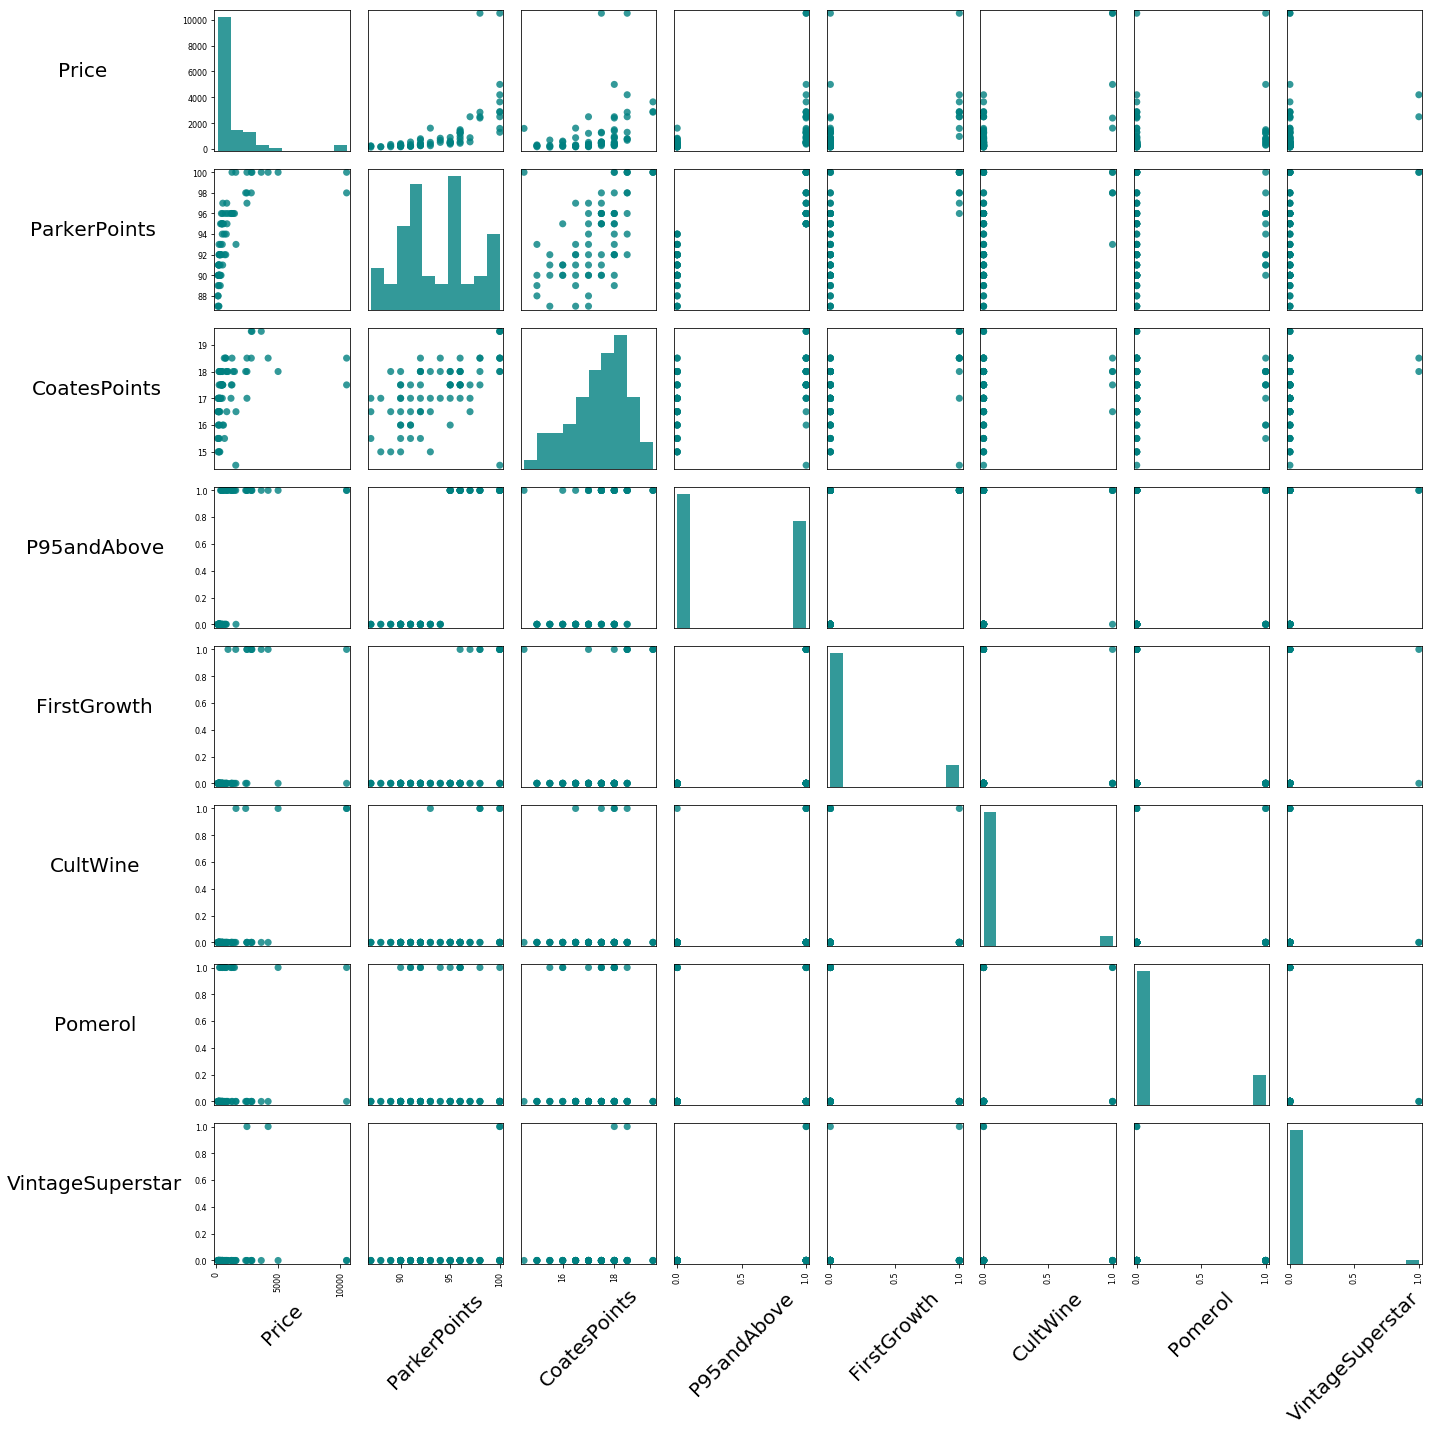

In [3]:
# Scatter Matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(20, 20), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, labelpad=100)
plt.tight_layout()

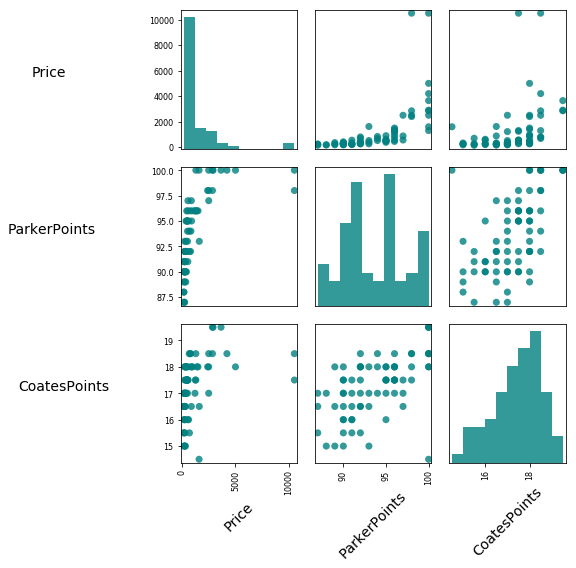

In [4]:
### Let's look at a ScatterMatrix of just the continuous columns with Price
continuous_cols = ["Price", "ParkerPoints", "CoatesPoints"]
scatter_matrix = pd.plotting.scatter_matrix(df[continuous_cols], figsize=(8, 8), 
                                            c='teal', hist_kwds={"color": "teal", "alpha":0.8}, 
                                            grid=True, alpha=0.8, s=200)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 14, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14, rotation = 0, labelpad=100)
plt.tight_layout()

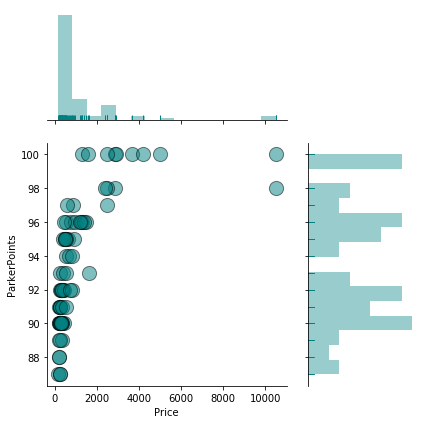

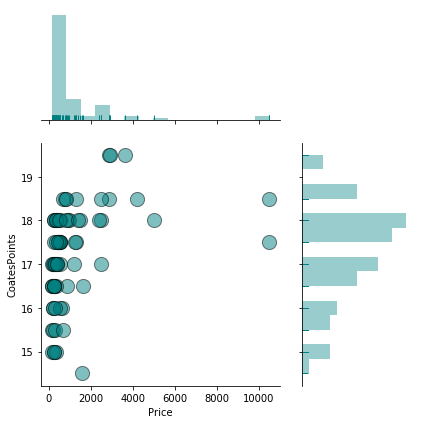

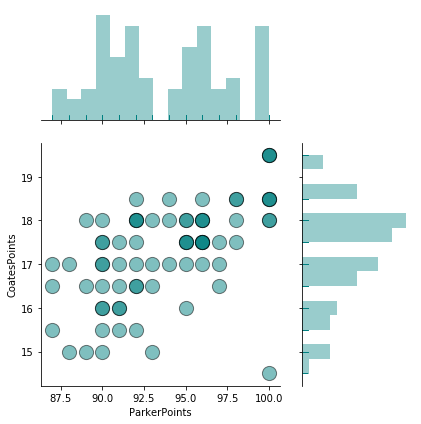

In [47]:
combos = combinations(continuous_cols, 2)
for combo in combos:
    sns.jointplot(x=combo[0], y=combo[1], data=df, kind='scatter', color='teal', s=200, alpha=0.5,
                  edgecolor="black", marginal_kws={"bins":15, "rug":True, "color": "teal"}, ratio=2)
plt.show()

### VIF


#### Step: Box-Cox demonstration, followed by students transforming in small groups

Time: 10 min
-Demo: Transform one or more predictor to normality, give students some variables to transform

#### Step: Student Discussion (10 min)

Time: 10 min 

Given four different models to choose from, break into small groups and choose the best one. Create and examine all of the models. Share the reasons for their choice to the main group.

##### Model Option 1: 
No transformed Variables. Price is predicted by First Growth, Cult Wine, Pomerol, and Vintage Superstar

##### Model Option 2: 
Log transformed Price is predicted by all variables except for P95 and Vintage Superstar

##### Model Option 3: 
LogPrice predicted by Box-Cox transformed Coates Points and all other variables except for P95

##### Model Option 4: 
Log Price is predicted by transformed Coates, transformed Parker, all others except for P95 and Vintage Superstar

### Assessment